https://stackabuse.com/k-means-clustering-with-scikit-learn/

https://scikit-learn.org/stable/modules/clustering.html


In [1]:
import fasttext
import pandas as pd
import random
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
from microtc.utils import save_model
from sklearn.cluster import MiniBatchKMeans

In [2]:
# cargar el MX.bin
ft = fasttext.load_model('../../ft_data/MX.bin') 

In [3]:
## todas las palabras del vocabulario
#words = random.sample(ft.get_words(), 1000)
words = ft.get_words()
len(words) # 

571689

In [4]:
## todos los vectores word x word
%time x = [ft.get_word_vector(w) for w in words]
# x list of numpy.ndarray of numpy.float32

Wall time: 14.3 s


In [5]:
# %time df = pd.DataFrame(x)

In [6]:
# %time df.describe()

In [7]:
# df.head()

In [8]:
%time ft.get_nearest_neighbors('casa')

Wall time: 9.03 s


[(0.7055066823959351, 'casita'),
 (0.6605292558670044, 'depa'),
 (0.6359991431236267, 'casaa'),
 (0.5902785062789917, 'recamara'),
 (0.5883163809776306, '🏠'),
 (0.5849549770355225, '🏡'),
 (0.5732880234718323, 'ksa'),
 (0.5494673252105713, 'habitacion'),
 (0.5479555130004883, 'casaabue'),
 (0.5374772548675537, 'casitaa')]

In [9]:
# ft.get_word_vector('casa')
# x list of numpy.ndarray of numpy.float32

In [10]:
def normalize(vector):
    return vector/np.linalg.norm(vector)

In [11]:
## normalizar cada vector
%time x_normalized = [normalize(v) for v in x]

In [1]:
x[0]

NameError: name 'x' is not defined

In [12]:
save_model(x_normalized, 'x_normalized_all_word.norm')

In [ ]:
len(words)

In [ ]:
len(x)

In [ ]:
 len(x_normalized)

In [23]:
## MiniBatchKMeans con los vectores normalizados
%time kmeans_mini = MiniBatchKMeans(n_clusters = 10000, init = 'k-means++', random_state = 42,  max_iter=100)
%time kmeans_mini.fit(x_normalized)

In [23]:
kmeans_mini_centers = np.sort(kmeans_mini.cluster_centers_, axis = 0)
kmeans_minis_labels = pairwise_distances_argmin(x_normalized, kmeans_mini_centers)

Wall time: 0 ns


C:\Users\Calderas\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  f"MiniBatchKMeans is known to have a memory leak on "


Wall time: 16min 28s


MiniBatchKMeans(n_clusters=10000, random_state=42)

In [ ]:
%time kmeans = KMeans(n_clusters = 10000, init = 'k-means++', random_state = 42,  max_iter=100)
%time kmeans.fit(x_normalized)

In [25]:
from microtc.utils import save_model
save_model(kmeans_fit, 'k-means-fit-all-10000.kmeans')

In [22]:
centroids = kmeans_mini.cluster_centers_

In [ ]:
from sklearn.cluster import MiniBatchKMeans
%time kmeans_mini = MiniBatchKMeans(n_clusters = 400, init = 'k-means++', random_state = 42,  max_iter=100)

In [73]:
%time df = pd.DataFrame(x_normalized)

CPU times: user 16.9 ms, sys: 1.03 ms, total: 17.9 ms
Wall time: 17.2 ms


In [76]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.048063,0.002465,0.068856,-0.049706,-0.005404,0.029251,0.029855,0.024838,-0.008794,-0.011775,...,0.022625,0.014962,-0.017719,0.025813,0.020600,-0.017776,0.022564,-0.020521,-0.018685,0.017812
std,0.060148,0.059554,0.058360,0.058235,0.052996,0.056047,0.062489,0.052626,0.053521,0.050826,...,0.064773,0.050453,0.061294,0.051648,0.047672,0.051016,0.053373,0.054882,0.051268,0.057398
min,-0.060959,-0.130392,-0.120841,-0.190018,-0.139096,-0.113941,-0.102089,-0.117995,-0.138958,-0.102301,...,-0.099143,-0.104845,-0.229043,-0.074920,-0.083715,-0.126726,-0.110096,-0.137098,-0.127713,-0.150913
25%,0.006000,-0.044709,0.034606,-0.091736,-0.048777,-0.004338,-0.018001,-0.011179,-0.046136,-0.047933,...,-0.024484,-0.015333,-0.054754,-0.010924,-0.009726,-0.053680,-0.013994,-0.055546,-0.061441,-0.017195
50%,0.046814,0.004574,0.073324,-0.051376,-0.004023,0.029196,0.031599,0.017997,-0.006140,-0.020933,...,0.028964,0.015790,-0.011692,0.024685,0.021100,-0.019506,0.022065,-0.028898,-0.016306,0.024552
75%,0.085719,0.044015,0.102122,-0.019317,0.026456,0.069052,0.077506,0.059280,0.025425,0.024286,...,0.068420,0.050792,0.017666,0.056247,0.050435,0.014900,0.053747,0.020868,0.019254,0.054894
max,0.208533,0.151895,0.191073,0.115738,0.129777,0.171910,0.157029,0.156573,0.165003,0.116807,...,0.149267,0.139152,0.131364,0.160954,0.126659,0.097203,0.166473,0.100623,0.079408,0.188379


In [77]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.037677,-0.035380,-0.012349,-0.042018,-0.065134,0.127315,-0.023627,-0.080275,-0.027260,-0.039208,...,0.085763,0.031285,0.006886,0.016922,0.099173,0.033155,0.002583,-0.037926,-0.001465,0.005860
1,0.011626,0.019375,0.000801,-0.107731,-0.017941,0.002497,0.073265,0.126857,-0.118182,-0.010503,...,-0.021398,-0.015392,-0.068001,0.002580,0.080875,-0.042964,-0.110096,-0.034457,-0.006336,0.033329
2,-0.006039,-0.027805,0.065933,-0.126930,-0.017458,0.060408,-0.100407,0.074994,0.019166,-0.018555,...,-0.028017,-0.076343,0.057872,0.052875,0.005777,-0.038075,0.028426,-0.090898,0.023276,0.053841
3,-0.001247,0.053870,0.054432,-0.048168,0.039787,-0.026753,0.033143,0.009893,-0.040901,0.026306,...,0.079848,0.089052,0.037910,0.019120,-0.070448,-0.024059,0.082493,-0.068873,-0.021600,-0.062101
4,-0.000229,-0.009246,-0.037379,0.030061,0.027567,0.073132,0.117822,0.039704,0.019304,-0.019422,...,0.082701,0.104111,-0.035886,0.027462,0.124262,-0.055095,0.030110,-0.052497,-0.097408,0.054159
5,0.090123,0.149896,0.083400,-0.086417,-0.016269,0.076229,0.015459,0.063722,-0.067703,-0.016176,...,-0.034662,-0.081919,-0.018830,0.089498,-0.022935,-0.022744,0.055124,-0.082281,-0.049014,-0.008583
6,0.159142,-0.044675,0.073706,-0.014656,0.066299,-0.004917,0.028621,-0.044473,0.013044,0.003984,...,0.004634,0.013070,-0.010817,-0.074920,-0.025727,-0.060651,0.024078,-0.017777,0.021260,0.095216
7,0.000880,-0.022491,0.089526,-0.190018,-0.010820,0.073608,0.143600,0.050915,-0.004300,0.016056,...,0.054077,-0.041020,-0.024655,0.060068,0.042088,-0.081806,-0.000574,-0.024816,-0.014048,0.036220
8,0.100499,0.046421,-0.077605,-0.025052,0.000935,0.072688,-0.065830,-0.033917,0.013429,0.019793,...,0.101558,-0.079138,0.051520,-0.019944,0.068027,0.008233,0.022714,0.045678,0.052384,0.024987
9,0.057130,-0.050985,0.069259,-0.023028,0.049407,0.098332,0.141137,0.035322,-0.056821,-0.073730,...,-0.013548,-0.025599,0.092155,0.058398,0.044430,-0.014656,0.092710,0.078035,-0.028202,0.076926


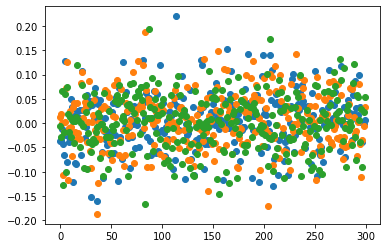

In [141]:
#fig, ax = plt.subplots()
#p2 = ax.spy(centroids, marker='^', markersize=0.5, c='red')
#p1 = ax.spy(x_normalized, markersize=0.1)

plt.scatter([*range(300)], df[0:1])
plt.scatter([*range(300)], df[1:2])
plt.scatter([*range(300)], df[2:3])

plt.show()

In [139]:
df[1:2]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1,0.011626,0.019375,0.000801,-0.107731,-0.017941,0.002497,0.073265,0.126857,-0.118182,-0.010503,...,-0.021398,-0.015392,-0.068001,0.00258,0.080875,-0.042964,-0.110096,-0.034457,-0.006336,0.033329


In [131]:
[*range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [92]:
df[0]

0    -0.037677
1     0.011626
2    -0.006039
3    -0.001247
4    -0.000229
        ...   
95   -0.015876
96    0.049466
97    0.002638
98    0.084251
99    0.097341
Name: 0, Length: 100, dtype: float64

In [93]:
x_normalized[0]

array([-3.76773030e-02, -3.53802592e-02, -1.23485466e-02, -4.20176610e-02,
       -6.51342571e-02,  1.27315387e-01, -2.36270763e-02, -8.02753791e-02,
       -2.72603910e-02, -3.92078497e-02, -3.15634720e-02,  4.89823371e-02,
        3.27817388e-02, -1.20331913e-01,  1.39504764e-02, -8.23828653e-02,
       -8.41784477e-02,  2.53750831e-02,  1.17768776e-02,  2.66119465e-02,
       -6.60982430e-02,  1.07959703e-01,  2.60435361e-02,  2.61660647e-02,
       -3.14476267e-02, -7.82984030e-03,  5.87225594e-02,  3.23680006e-02,
        4.49615568e-02,  4.55230884e-02, -1.53088555e-01,  3.78823094e-02,
        4.38952297e-02,  8.61856248e-03,  7.30967298e-02,  4.92363349e-02,
       -1.59689054e-01,  3.87669131e-02, -1.88030547e-03,  4.82022539e-02,
        9.69663076e-03, -5.96992821e-02, -1.12436265e-01, -1.66706312e-02,
        9.82643105e-03, -3.54590230e-02, -4.50752303e-02,  2.97344793e-02,
       -1.75189376e-02, -6.52902052e-02, -2.06918418e-02,  2.26165541e-02,
        4.14651036e-02, -